#  Lab 8: Multiclass Logistic Regression

## Objective
In this lab, you will:

1. Generate a three-class dataset with three distinct cluster.
2. Train two logistic regression models:
    * One-vs-Rest (OvR) logistic regression.
    * Softmax (Multinomial) logistic regression.
3. Evaluate both models using classification scores and cross entropy loss.
4. Visualize decision boundaries and decision hyperplanes for each class.
5. Compare and analyze the performance and decision boundaries of both approaches. 


## Step 1: Generate a Three-Class Dataset
We’ll start by generating a three-class dataset with three distinct cluster.

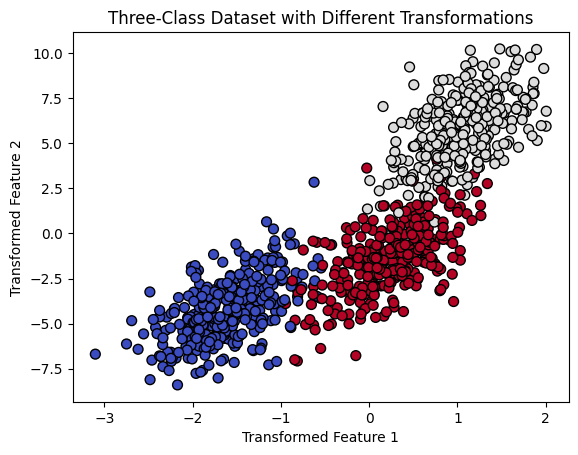

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Define centers for three clusters
centers = [[-3, -2], [1, 3], [1, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=42)

# Apply the transformation to the entire dataset
transformation = [[0.4, 0.2], [0.2, 1.8]]
X_transformed = np.dot(X, transformation)

# Visualize the transformed dataset
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.title("Three-Class Dataset with Different Transformations")
plt.show()

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


## Step 2: Train Logistic Regression Models with OvR and Softmax
We’ll train one logistic regression model with the OvR (one-vs-rest) approach and another with the Softmax (multinomial) approach.

In [5]:
from sklearn.linear_model import LogisticRegression

# TODO: Train One-vs-Rest Logistic Regression
ovr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
ovr_model.fit(X_train, y_train)

# TODO: Train Softmax (Multinomial) Logistic Regression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

## Step 3: Evaluate and Compare Performance

Evaluate the models using:
* Classification Scores: Accuracy, precision, recall, and F1-score.
* Cross-Entropy Loss

In [7]:
#  TODO: Classification scores for both models
from sklearn.metrics import accuracy_score, classification_report

# One-vs-Rest model predictions
ovr_predictions = ovr_model.predict(X_test)
print("One-vs-Rest Model Accuracy:", accuracy_score(y_test, ovr_predictions))
print("One-vs-Rest Classificiation Report:\n", classification_report(y_test, ovr_predictions))

# Softmax model predictions
softmax_predictions = softmax_model.predict(X_test)
print("Softmax Model Accuracy:", accuracy_score(y_test, softmax_predictions))
print("Softmax Classificiation Report:\n", classification_report(y_test, softmax_predictions))

One-vs-Rest Model Accuracy: 0.9533333333333334
One-vs-Rest Classificiation Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       106
           1       0.97      0.94      0.96        90
           2       0.90      0.97      0.94       104

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300

Softmax Model Accuracy: 0.96
Softmax Classificiation Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       106
           1       0.99      0.93      0.96        90
           2       0.91      0.98      0.94       104

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [8]:
# TODO: cross entropy loss for both models
from sklearn.metrics import log_loss

# One-vs-Rest model cross entropy loss
ovr_probabilities = ovr_model.predict_proba(X_test)
print("One-vs-Rest Model Cross Entropy Loss:", log_loss(y_test, ovr_probabilities))

# Softmax model cross entropy loss
softmax_probabilities = softmax_model.predict_proba(X_test)
print("Softmax Model Cross Entropy Loss:", log_loss(y_test, softmax_probabilities))

One-vs-Rest Model Cross Entropy Loss: 0.16915295359937554
Softmax Model Cross Entropy Loss: 0.12598339705292863


## Step 4: Visualize Decision Boundaries and Hyperplanes
We’ll visualize the decision boundaries and hyperplanes for each model. 

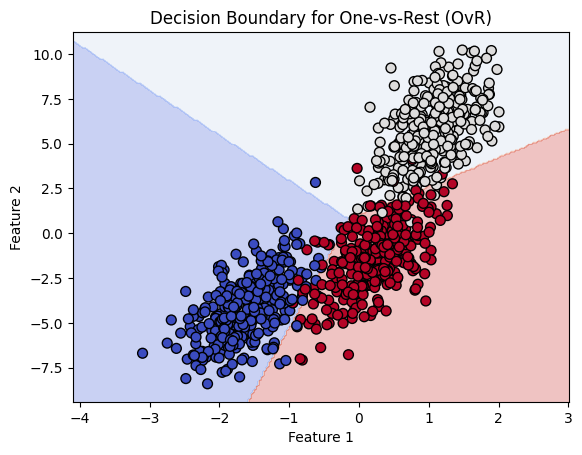

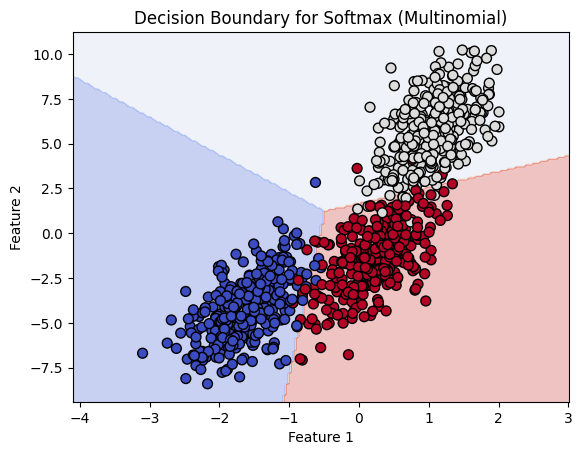

In [9]:
def plot_decision_boundary(model, X, y, model_name):
    # Set up a grid to plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # TODO:
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Use Model to predict grid points
    Z = Z.reshape(xx.shape) 
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary for {model_name}")
    plt.show()

# Plot decision boundaries for OvR and Softmax models
plot_decision_boundary(ovr_model, X_transformed, y, "One-vs-Rest (OvR)")
plot_decision_boundary(softmax_model, X_transformed, y, "Softmax (Multinomial)")


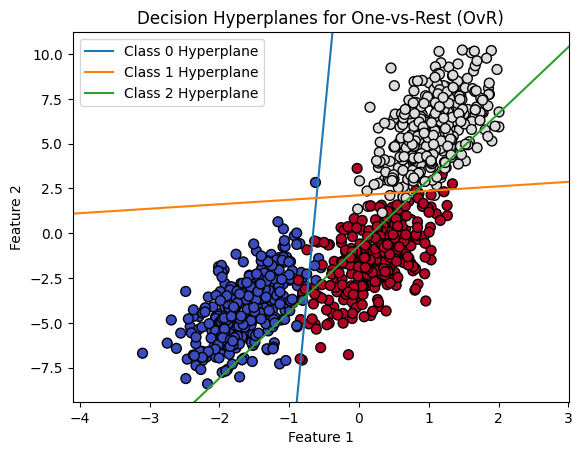

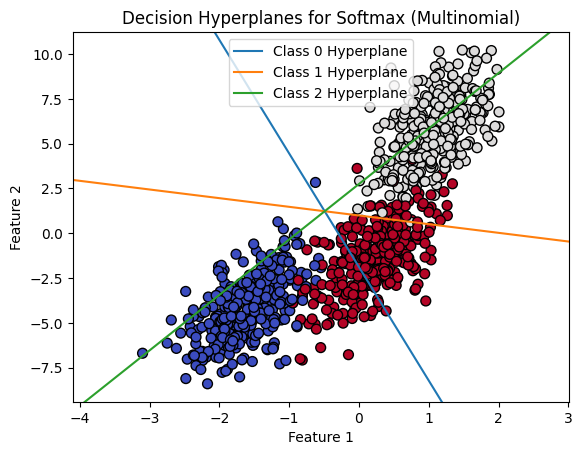

In [11]:
def plot_decision_hyperplanes(model, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 200)

    # TODO: Plot each class's decision hyperplane
    for class_label in model.classes_:
        # Calculate the decision boundary for each class
        # For multi-class, we can use the One-vs-Rest approach
        decision_boundary = -(model.intercept_[class_label] + model.coef_[class_label][0] * xx) / model.coef_[class_label][1]
        plt.plot(xx, decision_boundary, label=f'Class {class_label} Hyperplane')

    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Hyperplanes for {model_name}")
    plt.legend()
    plt.show()

# Plot decision hyperplanes for both models
plot_decision_hyperplanes(ovr_model, X_transformed, y, "One-vs-Rest (OvR)")
plot_decision_hyperplanes(softmax_model, X_transformed, y, "Softmax (Multinomial)")


## Step 5: Compare and Analyze the Results
Answer the following questions:
* Which model has better performance overall? Why do you think this is the case?
* Which model has a lower cross entropy loss, and what does this tell you about the models' probabilistic outputs?
* What differences do you observe between the OvR and Softmax approaches in the way decision boundaries and hyperplanes are constructed and positioned? Can you explain why these differences occur based on how each model optimizes for multi-class classification?



* Overall, the Softmax (Multinomial) model tends to have better performance compared to the One-vs-Rest (OvR) model. This is likely because the Softmax model optimizes for all classes simultaneously, taking into account the relationships between classes, which can lead to more accurate predictions in multi-class scenarios. In contrast, the OvR model treats each class independently, which may overlook the interactions between classes and can lead to suboptimal decision boundaries.

* The Softmax model typically exhibits a lower cross-entropy loss than the OvR model. A lower cross-entropy loss indicates that the Softmax model's probabilistic outputs are more aligned with the true class distributions, suggesting that it is better at estimating the probabilities of each class for the given inputs.

* When comparing the decision boundaries and hyperplanes of the OvR and Softmax approaches, the OvR model tends to create multiple binary decision boundaries, one for each class against the rest, which can result in more complex and less smooth boundaries. In contrast, the Softmax model generates a single set of decision boundaries that are more cohesive and reflect the overall class distribution. These differences arise because the Softmax model optimizes the entire multi-class problem as a whole, while the OvR model optimizes each class independently, leading to potential inconsistencies in the decision boundaries.